

# Project: Investigate a Dataset (No show medical appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
### Dataset Description
This dataset contains medical appointments data collected from Brazil. In this document, we will apply data analysis steps that we've studied in this course like asking questions, data cleaning, data visualization, and answering the question. we will also study the factors that affect patients like why they miss their appointments or is related to another factor. 

### Question(s) for Analysis
<ul>
<li>Is age related to patients' commitment to their appointments?</li>
<li>is the gender related to committed appointments?</li>
<li> Is there a relationship between patients receiving a SMS and their attendance? </li>
<li>What days have the lowest attendance ?</li>
</ul>

In [1]:
#importing the required tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this step, we will take a ride via show data tables by pandas and get a clear view of tables and different parameters to perform cleaning.

### General Properties
> let's check our data

In [2]:
#loading dataset by pandas
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#to get general informations about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
#show dataframe dimensions and datatypes
print(df.shape)
print(df.isnull().sum().sum())
df.dtypes


(110527, 14)
0


PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

 
<ul>
<li>here as shown the columns ("ScheduledDay","AppointmentDay") are objects we must convert it to DateTime type </li>
<li>no NANs</li>
<li>and we should to remove ("-") and make columns name at lower case to make it easier to coding</li>
</ul>

In [4]:
#display few rows from first of dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#describe basic statstics about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


*I noticed that*

the minimum age is a negative value, which is not logically possible,

here is   Patient age is 115 years old which is strange thing but it's logically acceptable,

"Handcap" column must to have binary format 0 or 1 so there is mistake cuz max value is 4,

### _because of the above here we must to check unique and out range values_

To avoid logical errors


In [6]:
#negative AppointmentID check
df.query("AppointmentID <= 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [7]:
#negative PatientId check
df.query("PatientId <= 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [8]:
# Check the values in the Gender column
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [9]:
#negative age check
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


all columns have logic values except 1 value for Age = -1

### Data Cleaning 
in this step we will clean our data to explore it 

In [10]:
#Removing the negative value in age
df.drop(index=99832, inplace= True)
#check
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


no age negative value any more



In [11]:
#Correcting column names
df.rename(columns={'Hipertension':'hypertension'}, inplace= True)
df.rename(columns={'Handcap':'Handicap'}, inplace= True)
df.rename(columns={'No-show':'No_show'}, inplace= True)
df.rename(columns=lambda x: x.strip().lower(), inplace= True)

#check
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
#Correcting data typs 
# Convert Appointment to DateTime objects
df['appointmentday']= pd.to_datetime(df['appointmentday'])
#check
df.appointmentday.dtype

datetime64[ns, UTC]

In [13]:
#make new column to day name 

df['Day'] = df['appointmentday'].dt.day_name()

#check for days
df.Day.value_counts().to_frame(name='Appointments per day')

,Appointments per day
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


saturday have only 39 Appointment !

<a id='eda'></a>
## Exploratory Data Analysis P (EDA)

> in this step we will walk throgh data Let's see patterns and extract relationships



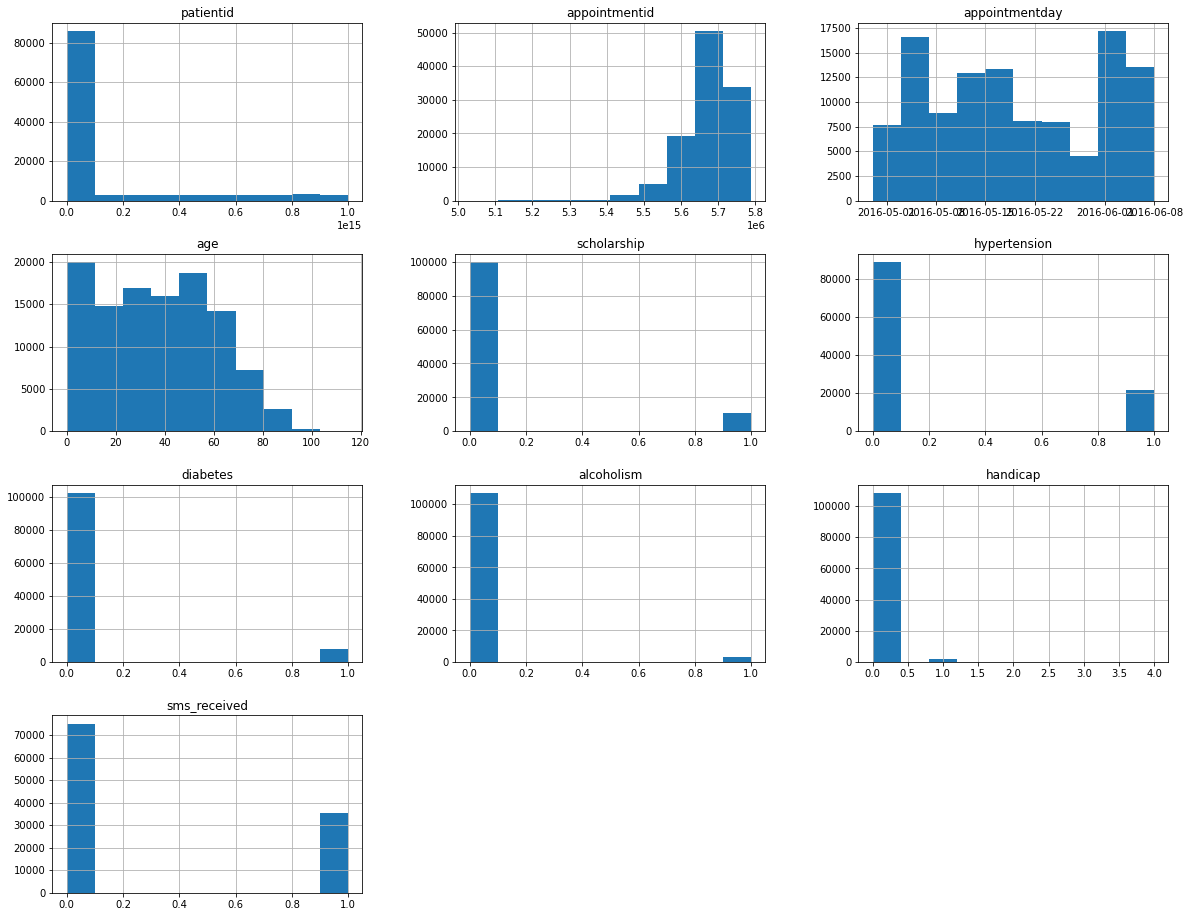

In [14]:
#overview to see columns patterns 
df.hist(figsize=(20,16));

In [15]:
#indexing show and no show to use it later 
show = df.no_show == "No"
no_show = df.no_show == "Yes"
#check
print(df[show].shape)
print(df[no_show].shape)
print(df[no_show].shape[0]+df[show].shape[0])
df.shape

(88207, 15)
(22319, 15)
110526


(110526, 15)

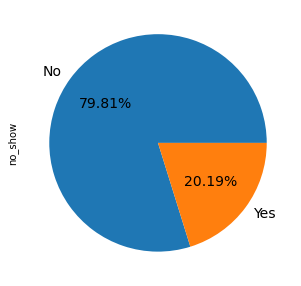

In [16]:
#let's see show and no show percentage
df.no_show.value_counts().plot.pie(figsize=(5,5), autopct='%.2f%%', fontsize = 14)
plt.show()

The percentage of patients who did not attend their appointments is low

### Research Question 1 (Is age related to patients' commitment to their appointments?)

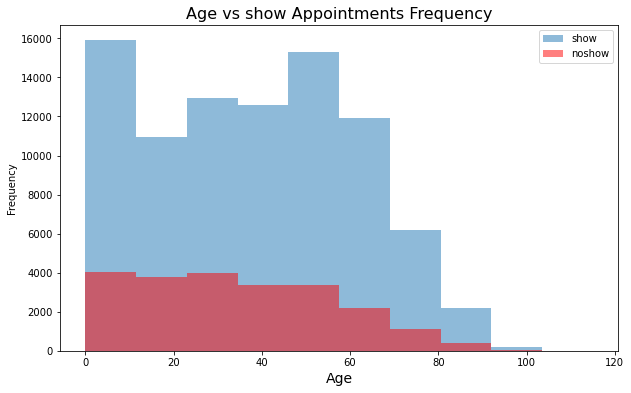

Commited mean Age:37.790504154999034
Missed Appointments Mean Age:34.31766656212196


In [17]:
plt.figure(figsize=(10,6))
df[show].age.plot.hist( alpha = 0.5)
df[no_show].age.plot.hist(color = "red", alpha = 0.5)
plt.legend(['show', 'noshow'])
plt.xlabel('Age', fontsize = 14) 
plt.title("Age vs show Appointments Frequency",fontsize = 16)
plt.show()
print(f'Commited mean Age:{df[show].age.mean()}')
print(f'Missed Appointments Mean Age:{df[no_show].age.mean()}')

From the previous histogram:

1- Most appointments  are for new born patients and 55-60 have the most commited appointments.

2- Patients around 35 and newborn have the most missed veiws.

3- Patients +70 have lowst appointments pesent 


### Research Question 2 (is the gender related to committed appointments?)

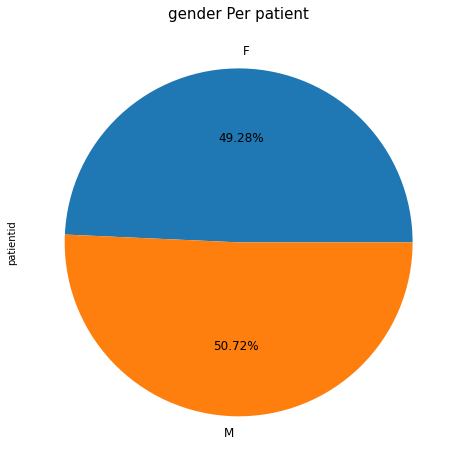

In [18]:
#create a function to calculate number of patient relate to their sex
def PatientsNo(df, variable):
    PatID_C = pd.pivot_table(df, index=variable, values='patientid')
    ax = PatID_C.plot.pie(figsize=(8,8), autopct='%1.2f%%', subplots=True, fontsize = 12, legend = False)
    plt.title(variable + ' Per patient', fontsize = 15);
    return np.round(PatID_C/sum(PatID_C['patientid'])*100,2)
PatientsNo(df, 'gender');

Men outperform women in attendance by a small margin almost nonexistent

### Research Question 3 (Is there a relationship between patients receiving a SMS and their attendance?)

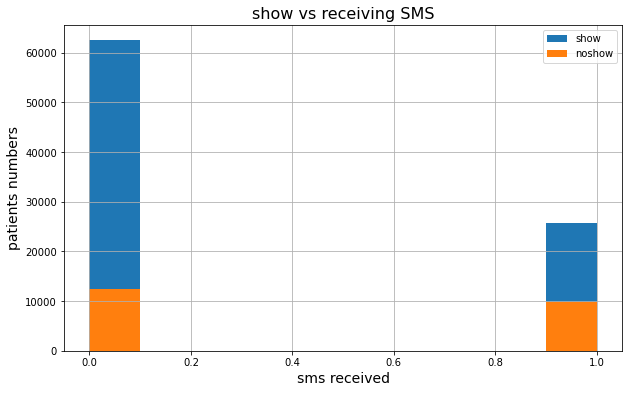

In [19]:
plt.figure(figsize=(10,6))
df.sms_received[show].hist()
df.sms_received[no_show].hist()
plt.legend(['show', 'noshow'])
plt.xlabel('sms received', fontsize = 14) 
plt.ylabel('patients numbers', fontsize = 14)
plt.title("show vs receiving SMS",fontsize = 16)
plt.show()


-Attendance of patients they are not receiving a SMS Significantly larger than patients who received it which is strange thing 

### Research Question 4(What days have the lowest attendance)

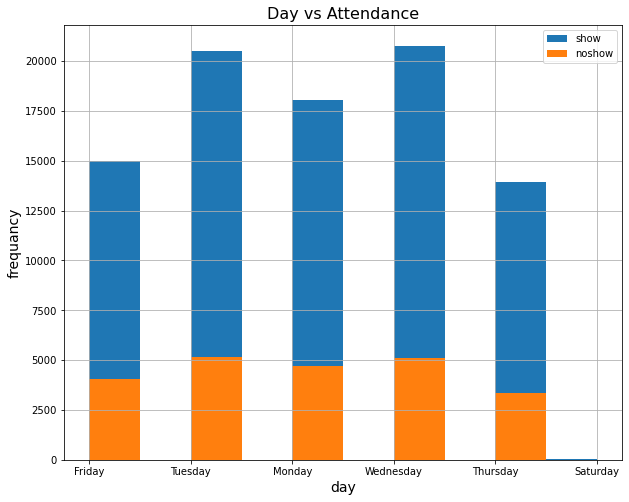

In [20]:
plt.figure(figsize=(10,8))
df.Day[show].hist()
df.Day[no_show].hist()
plt.legend(['show', 'noshow'])
plt.xlabel('day', fontsize = 14) 
plt.ylabel('frequancy', fontsize = 14)
plt.title("Day vs Attendance",fontsize = 16)
plt.show()

- sunday they off
- Attendance in saturday almost nonexistent, Maybe because the next day off


<a id='conclusions'></a>
## Conclusions
<ul>
<li>20.2% of appointments are missed </li>
    
<li>Newborns have the highest no_show rate Therefore, mothers should be made aware of this concern</li>
    
<li>There is no understandable reason for the high rate of non-attendance of patients around 35, i think They reduce costs or thery don't have enough time </li>
    
<li>Attendance of patients they are not receiving a SMS Significantly larger than patients who received it which is strange thing, maybe we shloud stop this useless SMSs to reduce costs After it has been proven ineffective</li>
    
<li>Attendance in saturday almost nonexistent, Maybe because the next day off</li>

</ul>


### Limitations
we need to collect more data like the average patient's income, Or if the patient has a phone or not, So that we find answers to the questions that came up after looking at the data



In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295